In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk

In [52]:
tf.__version__

'2.8.0'

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [53]:
dataset = pd.read_csv("stroke.csv")

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [54]:
dataset[dataset.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [55]:
dataset[dataset.isnull().any(axis=1)] 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [56]:
dataset = dataset.dropna()

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [57]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [58]:
x.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [59]:
x['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder

cols = ['ever_married', 'Residence_type'] 
le = LabelEncoder()
x[cols] = x[cols].apply(le.fit_transform)

x.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked
6,Male,74.0,1,1,1,Private,0,70.09,27.4,never smoked
7,Female,69.0,0,0,0,Private,1,94.39,22.8,never smoked
9,Female,78.0,0,0,1,Private,1,58.57,24.2,Unknown
10,Female,81.0,1,0,1,Private,0,80.43,29.7,never smoked
11,Female,61.0,0,1,1,Govt_job,0,120.46,36.8,smokes


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

#https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender', 'work_type', 'smoking_status'])], 
                       remainder='passthrough')
x = ct.fit_transform(x)

x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

In [62]:
columns = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=columns)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 0.82804382, -0.82763263, -0.01548388, ..., -1.01838567,
         2.73809643,  1.03901257],
       [-1.20766556,  1.20826556, -0.01548388, ...,  0.98194626,
        -0.31992826, -0.54643212],
       [-1.20766556,  1.20826556, -0.01548388, ...,  0.98194626,
        -0.95349315, -1.07491368],
       ...,
       [ 0.82804382, -0.82763263, -0.01548388, ..., -1.01838567,
         2.7974292 ,  0.03360862],
       [-1.20766556,  1.20826556, -0.01548388, ...,  0.98194626,
        -1.04942583, -1.53894627],
       [-1.20766556,  1.20826556, -0.01548388, ..., -1.01838567,
        -0.1121499 ,  0.21406574]])

# Architecture of Neural Network (MLP)
https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

Highlights:
1. Cycles: Define the model, compile, train, evaluate and estimate (predict)
2. About [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
    1. https://ruder.io/optimizing-gradient-descent/
    2. https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
    3. https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c
    4. TL;DR - Adam tends to converge faster, while SGD tends to generalize better
3. About [Error functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses):
    1. binary_crossentropy' for binary classification, 'sparse_categorical_crossentropy' for multiclass classification, and 'mse' (mean squared error) for regression.


In [65]:
tf.__version__

'2.8.0'

In [66]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [67]:
ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
131/131 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.9533
Epoch 2/20
131/131 [==============================] - 1s 4ms/step - loss: 0.1914 - accuracy: 0.9573
Epoch 3/20
131/131 [==============================] - 1s 4ms/step - loss: 0.1637 - accuracy: 0.9573
Epoch 4/20
131/131 [==============================] - 0s 4ms/step - loss: 0.1553 - accuracy: 0.9573
Epoch 5/20
131/131 [==============================] - 1s 5ms/step - loss: 0.1509 - accuracy: 0.9573
Epoch 6/20
131/131 [==============================] - 1s 4ms/step - loss: 0.1481 - accuracy: 0.9573
Epoch 7/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9573
Epoch 8/20
131/131 [==============================] - 0s 4ms/step - loss: 0.1443 - accuracy: 0.9573
Epoch 9/20
131/131 [==============================] - 1s 4ms/step - loss: 0.1432 - accuracy: 0.9573
Epoch 10/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1419 - accuracy: 0.9573

In [68]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 
#vn, fp(predict 1, correct is 0), fn (predict 0, correct is 1), vp

cm

array([[706,   0],
       [ 31,   0]])

In [70]:
accuracy_score(y_test, y_pred)

0.9579375848032564

In [71]:
dataset['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

### Comparing Optimizers

MLP with SGD optimizer

In [72]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [73]:
ann.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
sgd = ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
131/131 [==============================] - 1s 4ms/step - loss: 0.5562 - accuracy: 0.7699
Epoch 2/20
131/131 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.9509
Epoch 3/20
131/131 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.9573
Epoch 4/20
131/131 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9573
Epoch 5/20
131/131 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9573
Epoch 6/20
131/131 [==============================] - 0s 3ms/step - loss: 0.2072 - accuracy: 0.9573
Epoch 7/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.9573
Epoch 8/20
131/131 [==============================] - 1s 4ms/step - loss: 0.1917 - accuracy: 0.9573
Epoch 9/20
131/131 [==============================] - 0s 4ms/step - loss: 0.1863 - accuracy: 0.9573
Epoch 10/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9573

In [75]:
# evaluate the model
loss_sgd, acc_sgd = ann.evaluate(x_test, y_test, verbose=2)

loss_sgd, acc_sgd

24/24 - 0s - loss: 0.1651 - accuracy: 0.9579 - 279ms/epoch - 12ms/step


(0.16513395309448242, 0.9579375982284546)

In [76]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 

cm

array([[706,   0],
       [ 31,   0]])

In [78]:
accuracy_score(y_test, y_pred)

0.9579375848032564

MLP with Adam optimizer

In [79]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [80]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
adam = ann.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
131/131 [==============================] - 1s 4ms/step - loss: 1.1780 - accuracy: 0.2608
Epoch 2/20
131/131 [==============================] - 1s 4ms/step - loss: 0.5711 - accuracy: 0.7282
Epoch 3/20
131/131 [==============================] - 1s 5ms/step - loss: 0.3219 - accuracy: 0.9401
Epoch 4/20
131/131 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9559
Epoch 5/20
131/131 [==============================] - 1s 4ms/step - loss: 0.1970 - accuracy: 0.9573
Epoch 6/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.9573
Epoch 7/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9573
Epoch 8/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9573
Epoch 9/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1568 - accuracy: 0.9573
Epoch 10/20
131/131 [==============================] - 0s 4ms/step - loss: 0.1525 - accuracy: 0.9573

In [82]:
# evaluate the model
loss_adam, acc_adam = ann.evaluate(x_test, y_test, verbose=2)

loss_adam, acc_adam

24/24 - 0s - loss: 0.1527 - accuracy: 0.9579 - 293ms/epoch - 12ms/step


(0.15267334878444672, 0.9579375982284546)

In [83]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 

cm

array([[706,   0],
       [ 31,   0]])

In [85]:
accuracy_score(y_test, y_pred)

0.9579375848032564

Comparison Graphics

In [86]:
import matplotlib.pyplot as plt

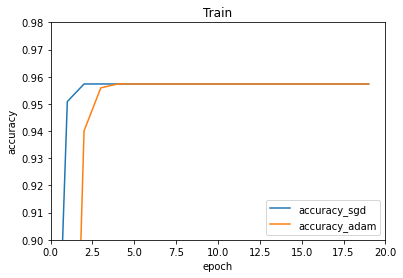

In [87]:
fig, ax = plt.subplots()

ax.plot(sgd.history['accuracy'])
ax.plot(adam.history['accuracy'])
ax.set_xlim(0, 20)
ax.set_ylim(0.90, 0.98)
plt.title('Train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy_sgd', 'accuracy_adam'], loc='lower right')
plt.show()

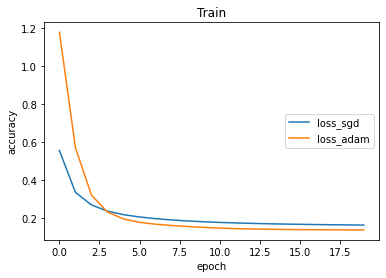

In [90]:

plt.plot(sgd.history['loss'])
plt.plot(adam.history['loss'])
plt.title('Train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss_sgd', 'loss_adam'], loc='center right')
plt.show()